In [9]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xplt

# LHC interaction region

In [31]:
# We define extra "markers" so that we can refer to these locations by name
lhc_ir_experiment_drift_length = 23.0
lhc_ir_inter_triplet_drift_length = 3.0
lhc_ir_inter_mq2_halves_drift_length = 1.0
lhc_ir_inter_d1_units_drift_length = 1.0
lhc_ir_triplet_quad_length = 6.0
lhc_ir_d1_unit_length = 3.4
lhc_ir_d2_length = 9.45
lhc_ir_separation_drift_length = 60.0
lhc_ir_qa_k1 = 0.008992568817
lhc_ir_qb_k1 = -0.007814970519

d_angle = 5/180*np.pi
d1_bending_radius = lhc_ir_d1_unit_length/(d_angle/5)
d2_bending_radius = lhc_ir_d2_length/d_angle

elements_lhc_ir = {
    'ip': xt.Marker(),
    'ir_end': xt.Marker(),
    'experiment_drift': xt.Drift(length=lhc_ir_experiment_drift_length),
    'inter_triplet_drift': xt.Drift(length=lhc_ir_inter_triplet_drift_length),
    'inter_mq2_halves_drift': xt.Drift(length=lhc_ir_inter_mq2_halves_drift_length),
    'separation_drift': xt.Drift(length=lhc_ir_separation_drift_length),
    'inter_d1_units_drift': xt.Drift(length=lhc_ir_inter_d1_units_drift_length),
    'long_drift': xt.Drift(length=50),
    'qa': xt.Quadrupole(length=lhc_ir_triplet_quad_length, k1=lhc_ir_qa_k1),
    'qb': xt.Quadrupole(length=lhc_ir_triplet_quad_length, k1=lhc_ir_qb_k1),
    'd1': xt.Bend(length=lhc_ir_d1_unit_length, k0=1/d1_bending_radius, h=1/d1_bending_radius),
    'd2': xt.Bend(length=lhc_ir_d2_length, k0=-1/d1_bending_radius, h=-1/d1_bending_radius),
 }

# Build the ring
lhc_ir = xt.Line(
    elements=elements_lhc_ir,
    element_names=[
        'ip',
        'experiment_drift',
        'qa',
        'inter_triplet_drift',
        'qb',
        'inter_mq2_halves_drift',
        'qb',
        'inter_triplet_drift',
        'qa',
        'inter_triplet_drift',
        'd1',
        'inter_d1_units_drift',
        'd1',
        'inter_d1_units_drift',
        'd1',
        'inter_d1_units_drift',
        'd1',
        'inter_d1_units_drift',
        'd1',
        'separation_drift',
        'd2',
        'inter_triplet_drift',
        'long_drift',
        'ir_end',
    ]
)

# Define reference particle
lhc_ir.particle_ref = xt.Particles(p0c=7000e9, mass0=xt.PROTON_MASS_EV)
lhc_ir.build_tracker()

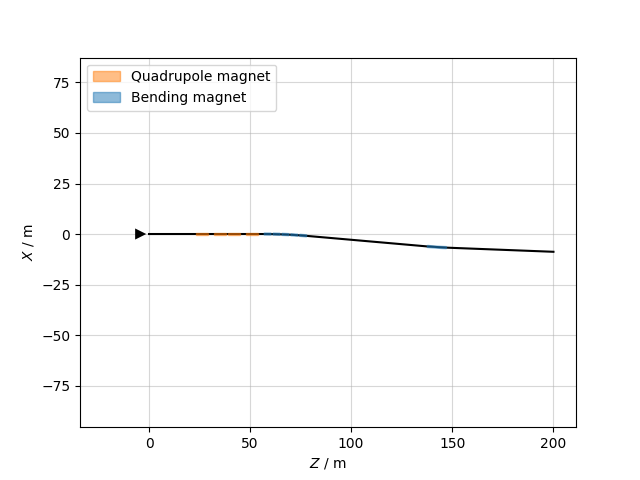

In [32]:
plot = xplt.FloorPlot(line=lhc_ir, labels="S.Q.")
plot.legend()

In [33]:
tw_ir = lhc_ir.twiss(
    method='4d', 
    start='ip', 
    end='ir_end', 
    betx=0.4,
    bety=0.4,
    alfx=0.0,
    alfy=0.0,
    dx=0.0,
    dpx=0.0,
    dy=0.0,
    dpy=0.0
)

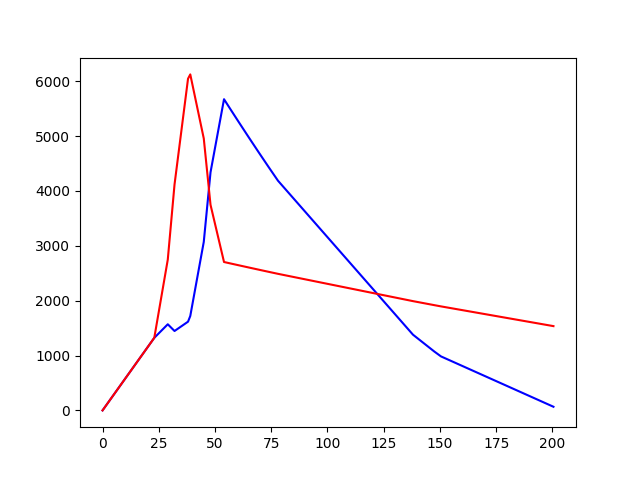

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tw_ir['s'], tw_ir['betx'], 'b')
ax.plot(tw_ir['s'], tw_ir['bety'], 'r')


# LHC arc cell

In [14]:
# We define extra "markers" so that we can refer to these locations by name
lhc_cell_drift_type_1_length = 0.75
lhc_cell_drift_type_2_length = 0.25
lhc_cell_quadrupole_length = 3.1
lhc_cell_dipole_length = 16

elements_lhc_cell = {
    'm_start_cell': xt.Marker(),
    'm_end_cell': xt.Marker(),
    'qf': xt.Quadrupole(length=lhc_cell_quadrupole_length, k1=0.008764273187),
    'qd': xt.Quadrupole(length=lhc_cell_quadrupole_length, k1=-0.008765159598),
    'mb': xt.Bend(length=lhc_cell_dipole_length),
    'drift_type_1': xt.Drift(length=lhc_cell_drift_type_1_length),
    'drift_type_2': xt.Drift(length=lhc_cell_drift_type_2_length),
 }

# Build the ring
lhc_cell = xt.Line(
    elements=elements_lhc_cell,
    element_names=[
        'm_start_cell',
        'drift_type_1',
        'mb',
        'drift_type_2',
        'mb',
        'drift_type_2',
        'mb',
        'drift_type_1',
        'qf',
        'drift_type_1',
        'mb',
        'drift_type_2',
        'mb',
        'drift_type_2',
        'mb',
        'drift_type_1',
        'qd',
        'm_end_cell',
    ]
)

# Define reference particle
lhc_cell.particle_ref = xt.Particles(p0c=7000e9, mass0=xt.PROTON_MASS_EV)
lhc_cell.build_tracker()

In [15]:
tw_cell = lhc_cell.twiss(
    method='4d', 
)

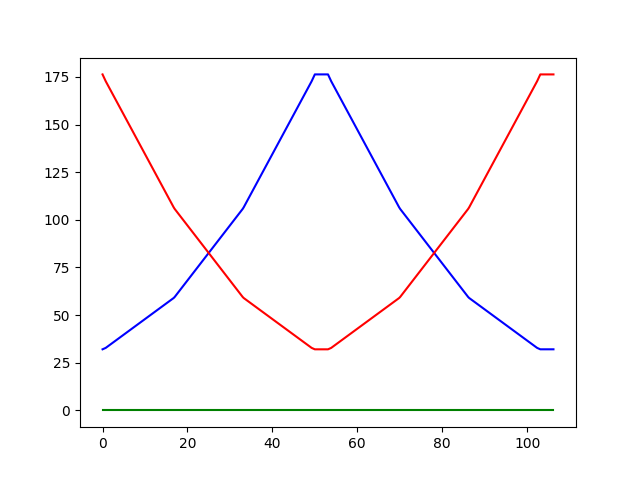

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tw_cell['s'], tw_cell['betx'], 'b')
ax.plot(tw_cell['s'], tw_cell['bety'], 'r')
ax.plot(tw_cell['s'], tw_cell['dx'], 'g')
